In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pip install plotly
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Case 1

## Part 1 Data Overview

In [398]:
#import data for case 1
loan = pd.read_csv("loans_full_schema.csv")
loan.head(5)


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


**Description:**

This dataset contains massive information regarding loan applications and applicants' information. It has 10,000 observations with 55 varibales.

***Variables:*** there're bascially 3 categories of variables: 
1. Personal information (from 'emp_title' to 'debt_to_income_joint' )
2. History of credit behaviors (from 'delinq_2y' to 'public_record_bankrupt' )
3. Characters for the loan application (from 'loan_purpose' to 'paid_late_fees' )

Summary for each numeric variable is showed below.



In [12]:
print(loan.shape)
loan_des = loan.describe().round(2)
loan_des

(10000, 55)


,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.00,10000.00,9976.00,1495.00,1495.00,10000.00,4342.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,2285.00,10000.00,10000.00,10000.00,10000.00,8729.00,10000.00,9682.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5.93,79222.15,19.31,127914.57,19.98,0.22,36.76,2001.29,1.96,22.68,11.40,183606.23,51049.06,0.01,0.17,46.11,0.00,184.33,2.66,4.38,7.34,11.38,0.0,0.00,3.60,27357.41,13.03,8.10,5.23,1.38,94.65,0.04,0.12,16361.92,43.27,12.43,476.21,14458.92,2494.23,1894.45,599.67,0.12
std,3.70,64734.29,15.00,70168.38,8.05,0.68,21.63,7.80,2.38,11.89,5.87,187632.71,53636.73,0.13,0.69,21.75,0.01,2206.39,2.94,3.16,5.98,5.86,0.0,0.01,2.43,26570.16,7.87,4.91,3.33,1.72,9.16,0.59,0.34,10301.96,11.03,5.00,294.85,9964.56,3958.23,3884.41,517.33,1.81
min,0.00,0.00,0.00,19200.00,0.32,0.00,1.00,1963.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,14.30,0.00,0.00,1000.00,36.00,5.31,30.75,0.00,0.00,0.00,0.00,0.00
25%,2.00,45000.00,11.06,86833.50,14.16,0.00,19.00,1997.00,0.00,14.00,7.00,51593.75,19185.50,0.00,0.00,29.00,0.00,0.00,1.00,2.00,2.00,7.00,0.0,0.00,2.00,10000.00,7.00,5.00,3.00,0.00,92.60,0.00,0.00,8000.00,36.00,9.43,256.04,6679.06,928.70,587.10,221.76,0.00
50%,6.00,65000.00,17.57,113000.00,19.72,0.00,34.00,2003.00,1.00,21.00,10.00,114667.00,36927.00,0.00,0.00,47.00,0.00,0.00,2.00,4.00,6.00,10.00,0.0,0.00,3.00,19500.00,11.00,7.00,5.00,1.00,100.00,0.00,0.00,14500.00,36.00,11.98,398.42,12379.50,1563.30,984.99,446.14,0.00
75%,10.00,95000.00,25.00,151545.50,25.50,0.00,53.00,2006.00,3.00,29.00,14.00,267550.00,65421.00,0.00,0.00,63.00,0.00,0.00,3.00,6.00,11.00,14.00,0.0,0.00,5.00,36100.00,17.00,10.00,7.00,2.00,100.00,0.00,0.00,24000.00,60.00,15.05,644.69,20690.18,2616.00,1694.56,825.42,0.00
max,10.00,2300000.00,469.09,1100000.00,39.98,13.00,118.00,2015.00,29.00,87.00,51.00,3386034.00,942456.00,3.00,52.00,128.00,1.00,199308.00,35.00,29.00,24.00,51.00,0.0,1.00,32.00,386700.00,66.00,46.00,43.00,14.00,100.00,52.00,3.00,40000.00,60.00,30.94,1566.59,40000.00,41630.44,40000.00,4216.44,52.98


**Issue:**

There are quite many NA in some variables, we need to fillna or drop those observations before building model.

## Part 2 Visualizations

In this part, we are going to take a close look on loan data by visualizations, step by step.


**First, let's get a overview of loans:**

There're 10 thousand loans issued during 2018 Q1, of which total amount is 163.52 million. The amount of loan issued for each month are 54.56, 49.98, 59.98 million, respectively

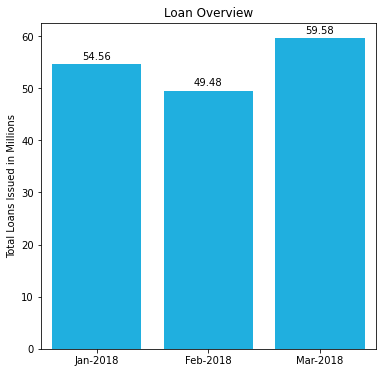

In [389]:
# Overview of Loans
sumloan_month = loan.groupby(['issue_month'])['loan_amount'].sum().to_frame()
sumloan_month['loan_amount'] = sumloan_month['loan_amount']/10**6
df = sumloan_month.reindex(['Jan-2018', 'Feb-2018', 'Mar-2018'])
plt.figure(figsize=(6, 6))
plots = sns.barplot(x = df.index, y = 'loan_amount', data=df, color = 'deepskyblue')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('Total Loans Issued in Millions')
plt.title("Loan Overview")
plt.show()
#sumloan_month.plot.bar()

**Why people need loans?**

The data tells us that people borrow money for 12 reasons. As the pie chart shows below, most people (~51.4%) borrow money to consolidate thier current debt. And ~22.5% people need money to pay thier credit cards balance. Also, ~6.8% people use the loan to make improvment in thier home.

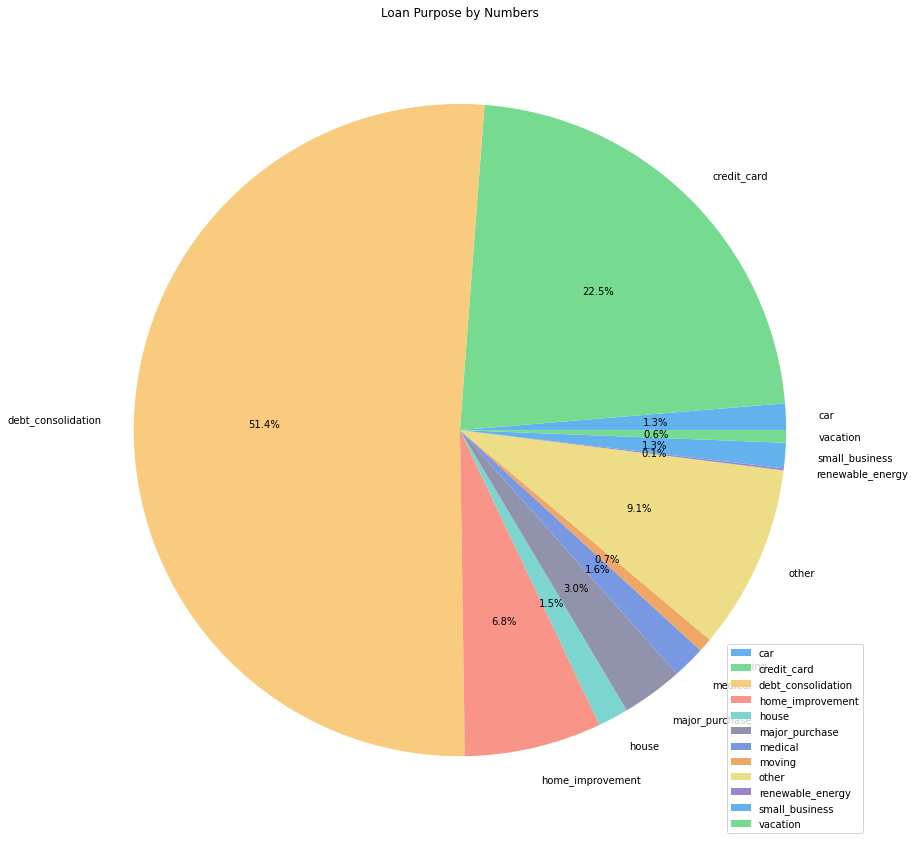

In [198]:
# Main purpose of loans
loan_purpose = loan.groupby(['loan_purpose'])['loan_amount'].sum().to_frame()
loan_purpose['num'] = loan.groupby(['loan_purpose'])['loan_amount'].count()
loan_purpose['average_amount'] = loan_purpose['loan_amount']/loan_purpose['num']
loan_purpose

plt.figure(figsize=(15, 15))
lab=loan_purpose.index
my_color = ['#63b2ee','#76da91','#f8cb7f', '#f89588','#7cd6cf','#9192ab','#7898e1','#efa666','#eddd86','#9987ce','#63b2ee', '#76da91']
plt.pie(loan_purpose['num'], labels=lab, autopct='%1.1f%%', colors = my_color)
plt.title("Loan Purpose by Numbers")

plt.legend()
plt.show()

**How they apply for a loan?**

As the pie chart shows below, most people (~85%) apply for a loan by themselves while the remaining ~15% people jointly apply for loans

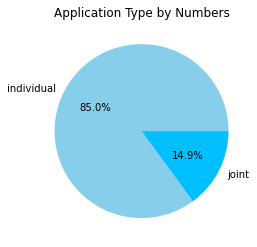

In [181]:
# application type loans
loan_type=loan.groupby(['application_type'])['loan_amount'].count().to_frame()
plt.pie(loan_type['loan_amount'], labels=loan_type.index, autopct='%1.1f%%', shadow=0, colors = ['skyblue','deepskyblue'])
plt.title("Application Type by Numbers")
plt.show()

**Next, we're courious about WHO borrow the money:**

Using the following map, we can easily tell that people from California (Top 1 with over 20 mn loan), Texas (13+ mn), New York (12+ mn), and Florida (11+ mn) borrow most loan.

*Note: if the map doesn't show, please open another file 'map.html' in the same folder*

In [397]:
# Map for loans
sumloan_state = loan.groupby(['state'])['loan_amount'].sum().to_frame()

fig = go.Figure(data=go.Choropleth( 
    locations=sumloan_state.index,  
    z = sumloan_state['loan_amount'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Blues', 
    colorbar_title = "Total Loan Amount", 
)) 

fig.update_layout( 
    title_text = 'Loan Amount for States', 
    geo_scope='usa',  
    #scope: "world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
)
fig.show()
fig.write_html("map.html") 

**Are those people poor or rich?**

The following two histograms present the distribution of annual income and debt to income ratio.
1. Most borrowers have a medium income between 25K and 100K. However, the distribution does have a fat tail at the right end, showing there're more super rich people whose annual income is over 175K that also need a loan
2. Most borrowers have a healthy financial leverage as debt to income ratio below 0.4, indicating low default probability. Nevertheless, those people at fat tail end whose debt to income ratio over 1.0 need more attention.

*Note: There're many exterme large numbers in income data so we need to log them before putting those income into our predictive model.*

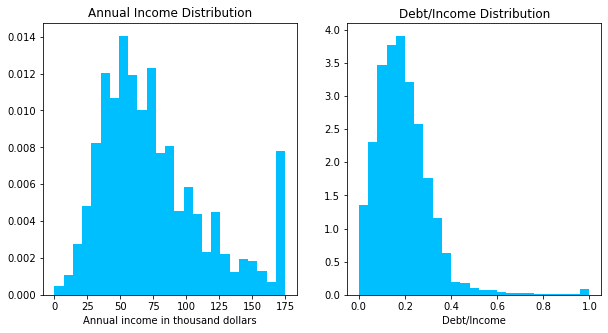

In [175]:
# Who borrows
plt.figure(figsize=(10, 5))

# Annual Income Distribution
x = loan['annual_income'] /1000
p95 = np.percentile(x, 95)
x[x>p95] = p95

plt.subplot(1, 2, 1)
plt.hist(x, bins=25, range=[0, p95], density = 1, color = 'deepskyblue')
plt.title("Annual Income Distribution")
plt.xlabel('Annual income in thousand dollars')

# Debt/Income Distribution
y = loan['debt_to_income']/100
y[y>1] = 1
plt.subplot(1, 2, 2)
plt.hist(y, bins=25, density = 1, color = 'deepskyblue')
plt.title("Debt/Income Distribution")
plt.xlabel('Debt/Income')
plt.show()

**Finally, let's look at interest rate**

According to common sense, each loan applicant would have a letter grade which indicate his/her credibility. I use box plot to compare the interest rates for different grades.

As showed below, 'A' refers to the highest credibility with lowest interest rate around 7% while G refers to the lowest credibility so that the interest rate is over 30% to compensate potential default risks.

I also find an outlier for grade D in which the applicant of grade D yet borrows loan with the same interest rate as grade A applicants.

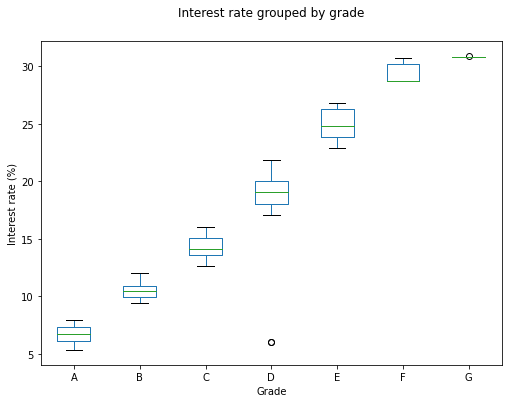

In [73]:
# interest rate for different grade
loan.boxplot(column='interest_rate',by='grade', grid = False, figsize=(8,6), fontsize=10)
plt.xlabel('Grade')
plt.ylabel('Interest rate (%)')
plt.suptitle('Interest rate grouped by grade')
plt.title('')
plt.show()

## Part 3 Predictive model

In part 3, we need to buil predictive model to project interest rate for different applicants using related information. The first model is multiple linear regression model. After the most basic one, I also choose the random forest regression model as an alternative because I think rf model fit the decision process.

However, before actually building models, we need to first clean our data as there're many NA and outliers.

Above all, let's look at on our dataset again.

In [399]:
df = loan.copy(deep = True)
df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [392]:
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

### 3.1 Data Cleaning and Features Picking

**Variables**
As said above, there're bascially 3 categories of variables: 
1. personal information (from 'emp_title' to 'debt_to_income_joint' )
2. history of credit behaviors (from 'delinq_2y' to 'public_record_bankrupt' )
3. characters for the loan application (from 'loan_purpose' to 'paid_late_fees' )

I need to pick variables from those 3 categories as features for predictive model
feature_personal = ['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income', 'verified_income', 'debt_to_income', 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint']

**Principle for data cleaning**
1. Fill na with reasonable numbers. For example, for employment length, fill 0 for no employment.
2. deal with extreme numbers, like income, use log
3. get dummies for category variables, like home ownership or grade
4. do some calculations to generate more proper variables, i.e, percentage of credit utilized
5. change date to period
6. Last step is to drop observations that still contains NA

**Apply those principles to all 3 categories of variables and pick all avaliable feature variables**

**First, let's start with application variables as it may interact with the other two**

feature_application = ['joint', 'amount', 'term', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F']

*Note: grade is a sepcial variable because it's highly related with interest rate. Therotically, adding grade into independet varibles could greatly enhance the explaining ability of the model. However, in real world, what we need to do is to determine each applicant's credibility based on his or her information and use the credibility to offer interest rate. Therefore, I think grade should not belong to independent variables. But I first take grade as one of the all avaliable variables, then I test my models with both features with grade and features without grade.*

In [400]:
df = loan.copy(deep = True)
# First, let's start with application variables as it may interact with the other two
df = pd.get_dummies(df, columns=['application_type'], prefix = '', prefix_sep = '', drop_first= 0)
df.drop(columns = ['individual'], inplace = True)

#log loan amount
df['amount'] = np.log(df['loan_amount'])
df['Grade'] = df['grade']

df = pd.get_dummies(df, columns=['grade'], drop_first= 0)
feature_application = ['joint', 'amount', 'term', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F']

df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,loan_amount,term,interest_rate,installment,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,joint,amount,Grade,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,28000,60,14.07,652.53,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,0,10.239960,C,0,0,1,0,0,0,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,5000,36,12.61,167.54,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,8.517193,C,0,0,1,0,0,0,0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,2000,36,17.09,71.40,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,7.600902,D,0,0,0,1,0,0,0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,21600,36,6.72,664.19,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,9.980449,A,1,0,0,0,0,0,0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,23000,36,14.07,786.87,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,1,10.043249,C,0,0,1,0,0,0,0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,5000,36,6.72,153.75,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0,0,8.517193,A,1,0,0,0,0,0,0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,24000,60,13.59,553.35,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0,1,10.085809,C,0,0,1,0,0,0,0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,20000,60,11.99,444.79,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0,0,9.903488,B,0,1,0,0,0,0,0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,20000,36,13.59,679.58,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0,0,9.903488,C,0,0,1,0,0,0,0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,6400,36,6.71,196.77,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0,0,8.764053,A,1,0,0,0,0,0,0


**Second, variables for personal features**

feature_personal = ['emp_length', 'home_MORTGAGE', 'home_OWN', 'income_log', 'debt_to_income', 'income_joint_log', 'debt_to_income_joint']

In [401]:
# variables for personal features
# job information
df['emp_length'] = df['emp_length'].fillna(0) # 0 refers to no job currently

# property information
#home_mapping = {"OWN":1, "MORTGAGE":0.5, "RENT":0}
#df['homeownership'] = df['homeownership'].map(home_mapping)
df = pd.get_dummies(df, columns=['homeownership'], prefix = 'home')

# log income
df['income_log'] = np.log(df['annual_income'])

# joint information
df['annual_income_joint'] = df['annual_income_joint'].fillna(0)
df['income_joint_log'] = np.log(df['annual_income_joint'] * df['joint'] + 1)

df['debt_to_income_joint'] = df['debt_to_income_joint'].fillna(0)
df['debt_to_income_joint'] = df['debt_to_income_joint'] * df['joint']


feature_personal = ['emp_length', 'home_MORTGAGE', 'home_OWN', 'income_log', 'debt_to_income', 'income_joint_log', 'debt_to_income_joint']
df.head(10)

E:\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



,emp_title,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,loan_amount,term,interest_rate,installment,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,joint,amount,Grade,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_MORTGAGE,home_OWN,home_RENT,income_log,income_joint_log
0,global config engineer,3.0,NJ,90000.0,Verified,18.01,0.0,NaN,0.00,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,28000,60,14.07,652.53,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,0,10.239960,C,0,0,1,0,0,0,0,1,0,0,11.407565,0.000000
1,warehouse office clerk,10.0,HI,40000.0,Not Verified,5.04,0.0,NaN,0.00,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,5000,36,12.61,167.54,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,8.517193,C,0,0,1,0,0,0,0,0,0,1,10.596635,0.000000
2,assembly,3.0,WI,40000.0,Source Verified,21.15,0.0,NaN,0.00,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,2000,36,17.09,71.40,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,7.600902,D,0,0,0,1,0,0,0,0,0,1,10.596635,0.000000
3,customer service,1.0,PA,30000.0,Not Verified,10.16,0.0,NaN,0.00,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,21600,36,6.72,664.19,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,9.980449,A,1,0,0,0,0,0,0,0,0,1,10.308953,0.000000
4,security supervisor,10.0,CA,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,23000,36,14.07,786.87,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,1,10.043249,C,0,0,1,0,0,0,0,0,0,1,10.463103,10.950824
5,NaN,0.0,KY,34000.0,Not Verified,6.46,0.0,NaN,0.00,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,5000,36,6.72,153.75,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0,0,8.517193,A,1,0,0,0,0,0,0,0,1,0,10.434116,0.000000
6,hr,10.0,MI,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,24000,60,13.59,553.35,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0,1,10.085809,C,0,0,1,0,0,0,0,1,0,0,10.463103,11.951187
7,police,10.0,AZ,110000.0,Source Verified,16.19,0.0,NaN,0.00,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,20000,60,11.99,444.79,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0,0,9.903488,B,0,1,0,0,0,0,0,1,0,0,11.608236,0.000000
8,parts,10.0,NV,65000.0,Source Verified,36.48,0.0,NaN,0.00,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,20000,36,13.59,679.58,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0,0,9.903488,C,0,0,1,0,0,0,0,1,0,0,11.082143,0.000000
9,4th person,3.0,IL,30000.0,Not Verified,18.91,0.0,NaN,0.00,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,

**Third, variables for credit behaviors**

feature_credit =['delinq_2y','months_since_last_delinq', 'credit_month','inquiries_last_12m', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized_pct', 'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq', 'total_collection_amount_ever', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_open_cc_accounts',
       'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt']

In [402]:
# variables for credit behaviors


df['months_since_last_delinq'] = df['months_since_last_delinq'].fillna(100000)

df['credit_month'] = 12*(2022 - df['earliest_credit_line'])

df['total_credit_utilized_pct'] = df['total_credit_utilized'] / df['total_credit_limit']

df['months_since_90d_late'] = df['months_since_90d_late'].fillna(100000)
feature_credit =['delinq_2y','months_since_last_delinq', 'credit_month',
       'inquiries_last_12m', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized_pct',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_open_cc_accounts',
       'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt']

df.head(10)


,emp_title,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,loan_amount,term,interest_rate,installment,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,joint,amount,Grade,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_MORTGAGE,home_OWN,home_RENT,income_log,income_joint_log,credit_month,total_credit_utilized_pct
0,global config engineer,3.0,NJ,90000.0,Verified,18.01,0.0,NaN,0.00,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,28000,60,14.07,652.53,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,0,10.239960,C,0,0,1,0,0,0,0,1,0,0,11.407565,0.000000,252,0.547595
1,warehouse office clerk,10.0,HI,40000.0,Not Verified,5.04,0.0,NaN,0.00,0,100000.0,1996,1,30,14,28800,4321,0,1,100000.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,5000,36,12.61,167.54,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,8.517193,C,0,0,1,0,0,0,0,0,0,1,10.596635,0.000000,312,0.150035
2,assembly,3.0,WI,40000.0,Source Verified,21.15,0.0,NaN,0.00,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,2000,36,17.09,71.40,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0,7.600902,D,0,0,0,1,0,0,0,0,0,1,10.596635,0.000000,192,0.661348
3,customer service,1.0,PA,30000.0,Not Verified,10.16,0.0,NaN,0.00,0,100000.0,2007,0,4,4,25400,4997,0,1,100000.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,21600,36,6.72,664.19,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0,9.980449,A,1,0,0,0,0,0,0,0,0,1,10.308953,0.000000,180,0.196732
4,security supervisor,10.0,CA,35000.0,Verified,57.96,57000.0,Verified,37.66,0,100000.0,2008,7,22,16,69839,52722,0,0,100000.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,23000,36,14.07,786.87,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,1,10.043249,C,0,0,1,0,0,0,0,0,0,1,10.463103,10.950824,168,0.754908
5,NaN,0.0,KY,34000.0,Not Verified,6.46,0.0,NaN,0.00,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,5000,36,6.72,153.75,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0,0,8.517193,A,1,0,0,0,0,0,0,0,1,0,10.434116,0.000000,384,0.092589
6,hr,10.0,MI,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,100000.0,2004,1,12,10,291852,18916,0,0,100000.0,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,24000,60,13.59,553.35,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0,1,10.085809,C,0,0,1,0,0,0,0,1,0,0,10.463103,11.951187,216,0.064814
7,police,10.0,AZ,110000.0,Source Verified,16.19,0.0,NaN,0.00,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,20000,60,11.99,444.79,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0,0,9.903488,B,0,1,0,0,0,0,0,1,0,0,11.608236,0.000000,204,0.177618
8,parts,10.0,NV,65000.0,Source Verified,36.48,0.0,NaN,0.00,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,20000,36,13.59,679.58,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0

**Finally, we combine all three feature subsets into one, and prepare the final dataset for model**

In [403]:
# Pick all possible features
feature = feature_personal + feature_credit + feature_application
#drop unnecessary columns
feature_ext = feature+['interest_rate']
df_clean = df.loc[:,feature_ext]
df_clean.dropna(how = 'any', inplace = True)
df_clean.head(10)

,emp_length,home_MORTGAGE,home_OWN,income_log,debt_to_income,income_joint_log,debt_to_income_joint,delinq_2y,months_since_last_delinq,credit_month,inquiries_last_12m,open_credit_lines,total_credit_limit,total_credit_utilized_pct,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_open_cc_accounts,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,joint,amount,term,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,interest_rate
0,3.0,1,0,11.407565,18.01,0.000000,0.00,0,38.0,252,6,10,70795,0.547595,0,0,38.0,0,1250,0.0,0,2,11100,8,1,92.9,0,0,0,10.239960,60,0,0,1,0,0,0,14.07
1,10.0,0,0,10.596635,5.04,0.000000,0.00,0,100000.0,312,1,14,28800,0.150035,0,1,100000.0,0,0,0.0,0,3,16500,14,0,100.0,0,1,0,8.517193,36,0,0,1,0,0,0,12.61
2,3.0,0,0,10.596635,21.15,0.000000,0.00,0,28.0,192,4,10,24193,0.661348,0,0,28.0,0,432,0.0,0,3,4300,8,0,93.5,0,0,0,7.600902,36,0,0,0,1,0,0,17.09
3,1.0,0,0,10.308953,10.16,0.000000,0.00,0,100000.0,180,0,4,25400,0.196732,0,1,100000.0,0,0,0.0,0,2,19400,3,0,100.0,1,0,0,9.980449,36,1,0,0,0,0,0,6.72
4,10.0,0,0,10.463103,57.96,10.950824,37.66,0,100000.0,168,7,16,69839,0.754908,0,0,100000.0,0,0,0.0,0,10,32700,15,0,100.0,0,0,1,10.043249,36,0,0,1,0,0,0,14.07
5,0.0,0,1,10.434116,6.46,0.000000,0.00,1,3.0,384,6,12,42100,0.092589,0,0,60.0,0,0,0.0,0,1,27200,12,3,78.1,0,0,0,8.517193,36,1,0,0,0,0,0,6.72
6,10.0,1,0,10.463103,23.66,11.951187,13.12,0,100000.0,216,1,10,291852,0.064814,0,0,100000.0,0,0,0.0,0,3,9100,7,2,100.0,0,0,1,10.085809,60,0,0,1,0,0,0,13.59
8,10.0,1,0,11.082143,36.48,0.000000,0.00,1,18.0,288,3,21,283190,0.245634,0,0,18.0,0,0,0.0,0,11,36700,14,2,97.1,0,0,0,9.903488,36,0,0,1,0,0,0,13.59
9,3.0,0,0,10.308953,18.91,0.000000,0.00,0,100000.0,252,0,6,33114,0.536571,0,0,100000.0,0,0,0.0,0,3,14700,5,0,100.0,0,0,0,8.764053,36,1,0,0,0,0,0,6.71
10,10.0,1,0,11.225243,10.45,0.000000,0.00,0,50.0,312,4,10,39433,0.580605,0,1,100000.0,0,0,0.0,0,2,5000,8,2,94.1,0,1,0,10.126631,60,0,0,1,0,0,0,15.04


### 3.2 Multi Linear Regression Model

*Note: for each model, we seperate the whole dataset into training data (80%) and testing data (20%) by random sample*

In [327]:
# Generate training set and testing set
df_train = df_clean.sample(frac = 0.8).copy(deep = True)
df_test = df_clean[~df_clean.index.isin(df_train.index)]
print(df_train.shape,df_test.shape)

from sklearn import linear_model
lm=linear_model.LinearRegression()

x_train = df_train[feature]
y_train = df_train['interest_rate']
model = lm.fit(x_train, y_train)
R2 = model.score(x_train, y_train)
print('R2 = %.3f' % R2)

# Result using out-of-sample-data
x_test = df_test[feature]
y_test = df_test['interest_rate']

score = model.score(x_test, y_test)
result = model.predict(x_test)
plt.figure()
plt.plot(np.arange(len(result)), y_test,label='true value')
plt.plot(np.arange(len(result)),result,label='predict value')

#'go-' 'ro-'
plt.title('score: %.3f'%score)
plt.legend()
plt.show()

(7725, 32) (1931, 32)


For MLR, I write a function 'mlr'(inputs are df_clean, and feature list) to generate R2 and out-of-sample test result. Function 'mlr_plot' can also generate plot to compare the predict value and true value in test data.

In [382]:
def mlr(df_clean, feature):
    # Generate training set and testing set
    df_train = df_clean.sample(frac = 0.8).copy(deep = True)
    df_test = df_clean[~df_clean.index.isin(df_train.index)]
    #print(df_train.shape,df_test.shape)
    
    from sklearn import linear_model
    lm=linear_model.LinearRegression()

    x_train = df_train[feature]
    y_train = df_train['interest_rate']
    model = lm.fit(x_train, y_train)
    R2 = model.score(x_train, y_train)
    #print('R2 = %.3f' % R2)
    
    # Result using out-of-sample-data
    x_test = df_test[feature]
    y_test = df_test['interest_rate']

    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    #plt.figure()
    #plt.plot(np.arange(len(result)), y_test,label='true value')
    #plt.plot(np.arange(len(result)),result,label='predict value')

    #plt.title('score: %.3f'%score)
    #plt.legend()
    #plt.show()
    
    r_pass = [R2, score]
    return r_pass

def mlr_plot(df_clean, feature):
    # Generate training set and testing set
    df_train = df_clean.sample(frac = 0.8).copy(deep = True)
    df_test = df_clean[~df_clean.index.isin(df_train.index)]
    print(df_train.shape,df_test.shape)
    
    from sklearn import linear_model
    lm=linear_model.LinearRegression()

    x_train = df_train[feature]
    y_train = df_train['interest_rate']
    model = lm.fit(x_train, y_train)
    R2 = model.score(x_train, y_train)
    print('R2 = %.3f' % R2)
    
    # Result using out-of-sample-data
    x_test = df_test[feature]
    y_test = df_test['interest_rate']

    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,label='true value')
    plt.plot(np.arange(len(result)),result,label='predict value')

    plt.title('score: %.3f'%score)
    plt.legend()
    plt.show()
    
    r_pass = [R2, score]
    return r_pass


**First, let's try feature with grade in MLR**

(7725, 38) (1931, 38)
R2 = 0.952


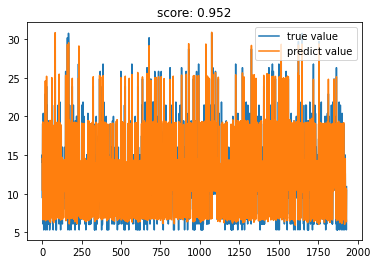

[0.9524909160523516, 0.9516866806948338]

In [394]:
mlr_plot(df_clean, feature)

The above result shows that R2 is 0.952, and score for out-of-sample test is 0.952. This model has a very strong explaining capability which is not surprising as it contains grade.

Then we repeat the model for 100 times to get the average score. As showed below, the avg. R2 is 0.952 and the avg. score is also 0.952.

In [381]:
N = 100
test_result = pd.DataFrame(index = range(N), columns = ['R2','test_result'])

for i in range(N):
    re = mlr(df_clean, feature)
    test_result.loc[i, 'R2'] = re[0]
    test_result.loc[i, 'test_result'] = re[1]

print(test_result.mean())

R2             0.952331
test_result    0.952227
dtype: float64


**Then, let's try feature without grade in MLR**

(7725, 38) (1931, 38)
R2 = 0.342


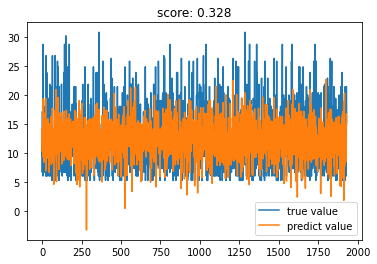

R2             0.339076
test_result    0.331816
dtype: float64


In [383]:
# No grade in features
feature_nograde = feature[:-6]

mlr_plot(df_clean, feature_nograde)

N = 100
test_result = pd.DataFrame(index = range(N), columns = ['R2','test_result'])

for i in range(N):
    re = mlr(df_clean, feature_nograde)
    test_result.loc[i, 'R2'] = re[0]
    test_result.loc[i, 'test_result'] = re[1]

print(test_result.mean())

Now the result is not as good as the model with grade. The R2 is only 0.342 while the score for out-of-sample test is 0.328. This model has less strong explaining capability than the previous one as the feature set drops 'grade'.

After repeating for 100 times, we get the avg.R2 of 0.339 and the avg. score of 0.331. 

### 3.2 Other predictive models (Random Forest as final model)

In [ ]:
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
from sklearn import svm
model_SVR = svm.SVR()

from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()

from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)

As usual, after trying different models, I finally choose random forest regression. The function 'rf' with the same inputs of df_clean and feature is to return R2 and out-of-sample result for the model. The function 'rf_plot' can also provide visualization for comparison.

In [384]:
# Random Forest Model
def rf_plot(df_clean, feature):
    # Generate training set and testing set
    df_train = df_clean.sample(frac = 0.8).copy(deep = True)
    df_test = df_clean[~df_clean.index.isin(df_train.index)]
    print(df_train.shape,df_test.shape)
    
    from sklearn import ensemble
    mod =ensemble.RandomForestRegressor(n_estimators=40)

    x_train = df_train[feature]
    y_train = df_train['interest_rate']
    model = mod.fit(x_train, y_train)
    R2 = model.score(x_train, y_train)
    print('R2 = %.3f' % R2)
    
    # Result using out-of-sample-data
    x_test = df_test[feature]
    y_test = df_test['interest_rate']

    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,label='true value')
    plt.plot(np.arange(len(result)),result,label='predict value')

    plt.title('score: %.3f'%score)
    plt.legend()
    plt.show()
    
    r_pass = [R2, score]
    return r_pass

def rf(df_clean, feature):
    # Generate training set and testing set
    df_train = df_clean.sample(frac = 0.8).copy(deep = True)
    df_test = df_clean[~df_clean.index.isin(df_train.index)]
    #print(df_train.shape,df_test.shape)
    
    from sklearn import ensemble
    mod =ensemble.RandomForestRegressor(n_estimators=40)

    x_train = df_train[feature]
    y_train = df_train['interest_rate']
    model = mod.fit(x_train, y_train)
    R2 = model.score(x_train, y_train)
    #print('R2 = %.3f' % R2)
    
    # Result using out-of-sample-data
    x_test = df_test[feature]
    y_test = df_test['interest_rate']

    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    #plt.figure()
    #plt.plot(np.arange(len(result)), y_test,label='true value')
    #plt.plot(np.arange(len(result)),result,label='predict value')

    #plt.title('score: %.3f'%score)
    #plt.legend()
    #plt.show()
    
    r_pass = [R2, score]
    return r_pass


**First try random forest regression in which feature set contains grade. The result are showed in the plot below.**

We have 7725 observations for training and 1931 ones for testing. The R2 is 0.993, incredibly high, and the out-of-sample score is 0.952.

(7725, 38) (1931, 38)
R2 = 0.993


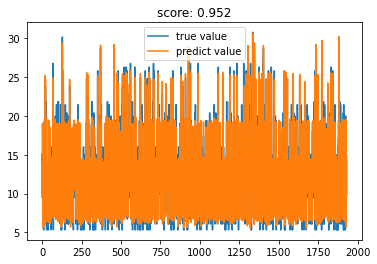

[0.992818195657218, 0.9521348516944557]

In [385]:
rf_plot(df_clean, feature)

**Next try random forest regression without 'grade'. The result are showed in the plot below.**

We have 7725 observations for training and 1931 ones for testing. The R2 is 0.908, while the out-of-sample score is only 0.371.

(7725, 38) (1931, 38)
R2 = 0.908


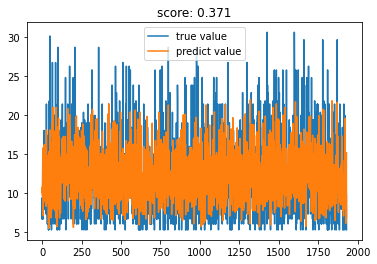

[0.9080311188395469, 0.3709584543546065]

In [386]:
# No grade in features
feature_nograde = feature[:-6]
rf_plot(df_clean, feature_nograde)

By repeating this model without 'grade' for 20 times, we get the avg. R2 of 0.906 while the avg. out-of-sample score of 0.372

In [368]:
# Replicate testing
N = 20
test_result = pd.DataFrame(index = range(N), columns = ['R2','test_result'])

for i in range(N):
    re = rf(df_clean, feature)
    test_result.loc[i, 'R2'] = re[0]
    test_result.loc[i, 'test_result'] = re[1]

print(test_result.mean())

R2             0.906205
test_result    0.372680
dtype: float64


## Part 4 Comments and Reflection

If I have more time, I would definitely take a even closer check on every independent variables. I also need to check the correlations and collinearity between those variables.
Clustering could also be applied for prediction.

# Case 2 

In [404]:
#import data for case 2
cs2 = pd.read_csv("casestudy2.csv", index_col= 0 )
cs2.head(5)

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [405]:
cs2.describe()

,net_revenue,year
count,685927.000000,685927.000000
mean,125.647755,2016.027252
std,71.854528,0.837203
min,1.000000,2015.000000
25%,63.510000,2015.000000
50%,125.730000,2016.000000
75%,187.820000,2017.000000
max,250.000000,2017.000000


**Revenue for each year**

Revenue for 2015: 29.04 mn

Revenue for 2016: 25.73 mn

Revenue for 2017: 31.42 mn

          revenue
year             
2015  29036749.19
2016  25730943.59
2017  31417495.03


<AxesSubplot:xlabel='year'>

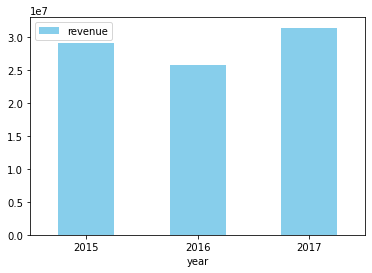

In [406]:
# Year Revnue
rev = pd.DataFrame()
rev['revenue'] = cs2.groupby(['year'])['net_revenue'].sum()
print(rev)
rev.plot.bar(rot=0,color = 'skyblue')

In [407]:
cs2['last_year'] = cs2['year'] -1
cs2['rev_prev'] = cs2.groupby(['customer_email'])['net_revenue'].shift(1)
cs2.head(10)

,customer_email,net_revenue,year,last_year,rev_prev
0,nhknapwsbx@gmail.com,249.92,2015,2014,NaN
1,joiuzbvcpn@gmail.com,87.61,2015,2014,NaN
2,ukkjctepxt@gmail.com,168.38,2015,2014,NaN
3,gykatilzrt@gmail.com,62.40,2015,2014,NaN
4,mmsgsrtxah@gmail.com,43.08,2015,2014,NaN
5,mobvusnzfr@gmail.com,39.44,2015,2014,NaN
6,kxwkqvacsv@gmail.com,171.46,2015,2014,NaN
7,iqmnugdcjs@gmail.com,111.99,2015,2014,NaN
8,baiikostmd@gmail.com,170.70,2015,2014,NaN
9,lfeafnigbu@gmail.com,54.99,2015,2014,NaN


**Revenue breakdown for existing customers and new customers is showed in the following table**

rev_exist refers to Revenue from existing customers

rev_new refers to Revenue from new customers

*Note: for 2015, we can't seperate existing revenue and new revenue for 2015 due to lack of data of 2014.*

In [268]:
rev['rev_exist'] = cs2.groupby(['year'])['rev_prev'].sum()
rev['rev_new'] = rev['revenue'] - rev['rev_exist']
#Due to lack of data of 2014, we can't seperate existing revenue and new revenue for 2015, so leave them blant
rev.iloc[0,1] = np.nan
rev.iloc[0,2] = np.nan
rev

,revenue,rev_exist,rev_new
year,,,
2015,29036749.19,NaN,NaN
2016,25730943.59,7465117.12,18265826.47
2017,31417495.03,2716280.02,28701215.01


**Existing Customer Revenue and its change are showed in the following table**

rev_exist_prev refers to Existing Customer Revenue for previous year

rev_growth_exist refers to Existing Customer Growth

In [269]:
# To get exisiting customer growth
rev['rev_exist_prev'] = rev['rev_exist'].shift(1)
rev['rev_growth_exist'] = rev['rev_exist'] -  rev['rev_exist_prev']
rev

,revenue,rev_exist,rev_new,rev_exist_prev,rev_growth_exist
year,,,,,
2015,29036749.19,NaN,NaN,NaN,NaN
2016,25730943.59,7465117.12,18265826.47,NaN,NaN
2017,31417495.03,2716280.02,28701215.01,7465117.12,-4748837.1


In [259]:
#Revenue lost from attrition
print("Revenue lost from attrition for 2017 are","%.2f" % -rev.iloc[2,4])

Revenue lost from attrition for 2017 are 4748837.10


**Number of Customers and its breakdown are showed in the following table**

In [277]:
# Customers Count

# Total Customers Current Year
rev['num_total'] = cs2.groupby(['year'])['customer_email'].count()

# Total Customers Previous Year
rev['num_total_prev'] =rev['num_total'].shift(1)

# New Customers
rev['num_exist'] = cs2.groupby(['year'])['rev_prev'].count()
rev['num_new'] = rev['num_total'] - rev['num_exist']

#Due to lack of data of 2014, we can seperate existing or new customers for 2015, so leave them blant
rev.iloc[0,7] = np.nan
rev.iloc[0,8] = np.nan

rev

,revenue,rev_exist,rev_new,rev_exist_prev,rev_growth_exist,num_total,num_total_prev,num_exist,num_new
year,,,,,,,,,
2015,29036749.19,NaN,NaN,NaN,NaN,231294,NaN,NaN,NaN
2016,25730943.59,7465117.12,18265826.47,NaN,NaN,204646,231294.0,59584.0,145062.0
2017,31417495.03,2716280.02,28701215.01,7465117.12,-4748837.1,249987,204646.0,21725.0,228262.0


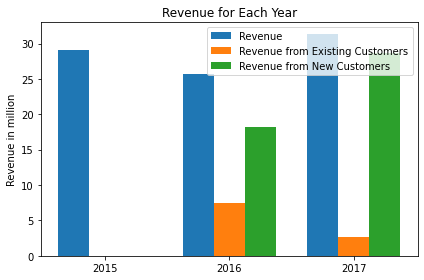

In [282]:
# Visualization
labels = rev.index
barWidth = 0.25

r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, rev['revenue']/10**6, barWidth, label='Revenue')
rects2 = ax.bar(r2, rev['rev_exist']/10**6, barWidth, label='Revenue from Existing Customers')
rects3 = ax.bar(r3, rev['rev_new']/10**6, barWidth, label='Revenue from New Customers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenue in million')
ax.set_title('Revenue for Each Year')
plt.xticks([r + barWidth for r in range(len(labels))], labels)
ax.legend()

fig.tight_layout()

plt.show()

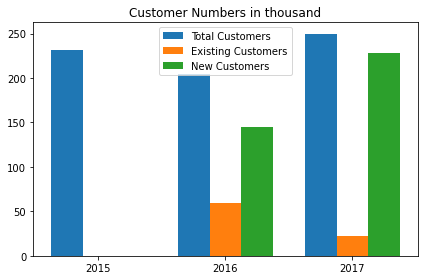

In [387]:
labels = rev.index
barWidth = 0.25

r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, rev['num_total']/10**3, barWidth, label='Total Customers')
rects2 = ax.bar(r2, rev['num_exist']/10**3, barWidth, label='Existing Customers')
rects3 = ax.bar(r3, rev['num_new']/10**3, barWidth, label='New Customers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Customer Numbers in thousand')
plt.xticks([r + barWidth for r in range(len(labels))], labels)
ax.legend()

fig.tight_layout()

plt.show()

**Observation:**
1. Revenue from existing customers was decreasing in the past two years due to failure of customer retention.
2. However, new customers revenue shows robust growth momentum, which support the overall revenue growth.
3. For further observation, we could calculate the avg. revenue per customer and compare the avg. revenue per customer of existing customers with that of new customers.

*Answered by Ziming (Gary) Sang in Apr.10th*